### Goldsmiths University of London
### Authors...: Sandor Kanda (skand001) + Carlos Alves (cdeol003)
### Created...: 13/02/2023

### Github repo URL: https://github.com/carlos-alves-one/ML-Coursework.git

### The Task:

The task is based on an energy efficiency prediction problem which is a regression problem. 
More specifically, you are required to perform an analysis using different building shapes, 
with different characteristics, and predict the heating load of the building. 
The buildings differ with respect to the glazing area, the glazing area distribution, the 
orientation, and other aspects comprised in the dataset.
The dataset (below) for this task includes 9 features, denoted by X0, X1, ..., X8, and an 
outcome variable Y which needs to be predicted. 

The dataset contains missing values. Here is the meaning of the 10 variables:

X0: Category of the building
X1: Relative Compactness
X2: Surface Area
X3: Wall Area
X4: Roof Area
X5: Overall Height
X6: Orientation
X7: Glazing Area
X8: Glazing Area Distribution
ƒ
Y: Heating Load

 You are required to perform this analysis comprising: 
 
2. Data preprocessing including data splitting in 70% training data, and 30% test data, 
3. Data transformations you consider useful for this task, <br>
3.1 Treatment of missing values,<br>
3.2 Feature selection if you consider it useful for helping you achieve a better performance, etc. 

#### The analysis should include developing the predictive models based on the following algorithms already studied in this module, or that are going to be studied such as neural networks: 
1. Simple Linear Regression, 
2. Ridge Regression, 
3. Lasso Regression, 
4. Elastic Net Regression, 
5. Polynomial Regression with regularisation, 
6. Neural Network. 

#### These models (except simple Linear Regression which needs only to be simply trained) will be:
1. Tuned using the training set. 
2. The training set will be used to select the best 2 models. 
3. Only these 2 best models will be evaluated on the test set. 

The code, comments and explanations will be provided in a Python Jupyter notebook, which should include also the results of running your notebook.


**Justify decisions !!!!**

### 1. Module Imports

In [1]:
# Import relevant libraries for the project

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import os
import sklearn
import sys

# Python ≥3.5 is required
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"


### 1.1 Data Visualisation Setup

In [2]:

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Machine Learning Coursework"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2. Data Acquisition 


In [3]:
# load the dataset
df = pd.read_csv('datcw_na.csv_', encoding='ISO-8859-1')

# remove unicode characters from column name
df = df.rename(columns=lambda x: x.replace('\u00ca', ''))

# change the column names to actual variable names
df = df.rename(columns={ 'X0': 'Category of the Building',
                         'X1': 'Relative Compactness',
                         'X2': 'Surface Area',
                         'X3': 'Wall Area',
                         'X4': 'Roof Area',
                         'X5': 'Overall Height',
                         'X6': 'Orientation',
                         'X7': 'Glazing Area',
                         'X8': 'Glazing Area Distribution',
                         'Y':  'Heating Load'})


# save the updated dataset
df.to_csv('datcw_na.csv_', index=False)

### 2.2 Data Stucture Inspection

In [4]:
# Import the dataset for the project
dataset = pd.read_csv('datcw_na.csv_')

# Check the dataset for the first 5 rows
dataset.head()


,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category of the building   768 non-null    object 
 1   Relative Compactness       768 non-null    float64
 2   Surface Area               768 non-null    float64
 3   Wall Area                  728 non-null    float64
 4   Roof Area                  768 non-null    float64
 5   Overall Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing Area               768 non-null    float64
 8   Glazing Area Distribution  768 non-null    float64
 9   Heating Load               768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


In [6]:
# notice that "Category of the building" is the only nominal/categorical variable, with the following counts on its values
dataset["Category of the building"].value_counts()

C2    265
C3    260
C1    243
Name: Category of the building, dtype: int64

In [7]:
# here's useful description of the data counts and distributions of variables
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


### 2.3 Visualising the pre-procesed data

talk about distribution (split/not split data- find the interpretation of the data, with a caviat, that it might not be  reasonable)

Saving figure attribute_histogram_plots


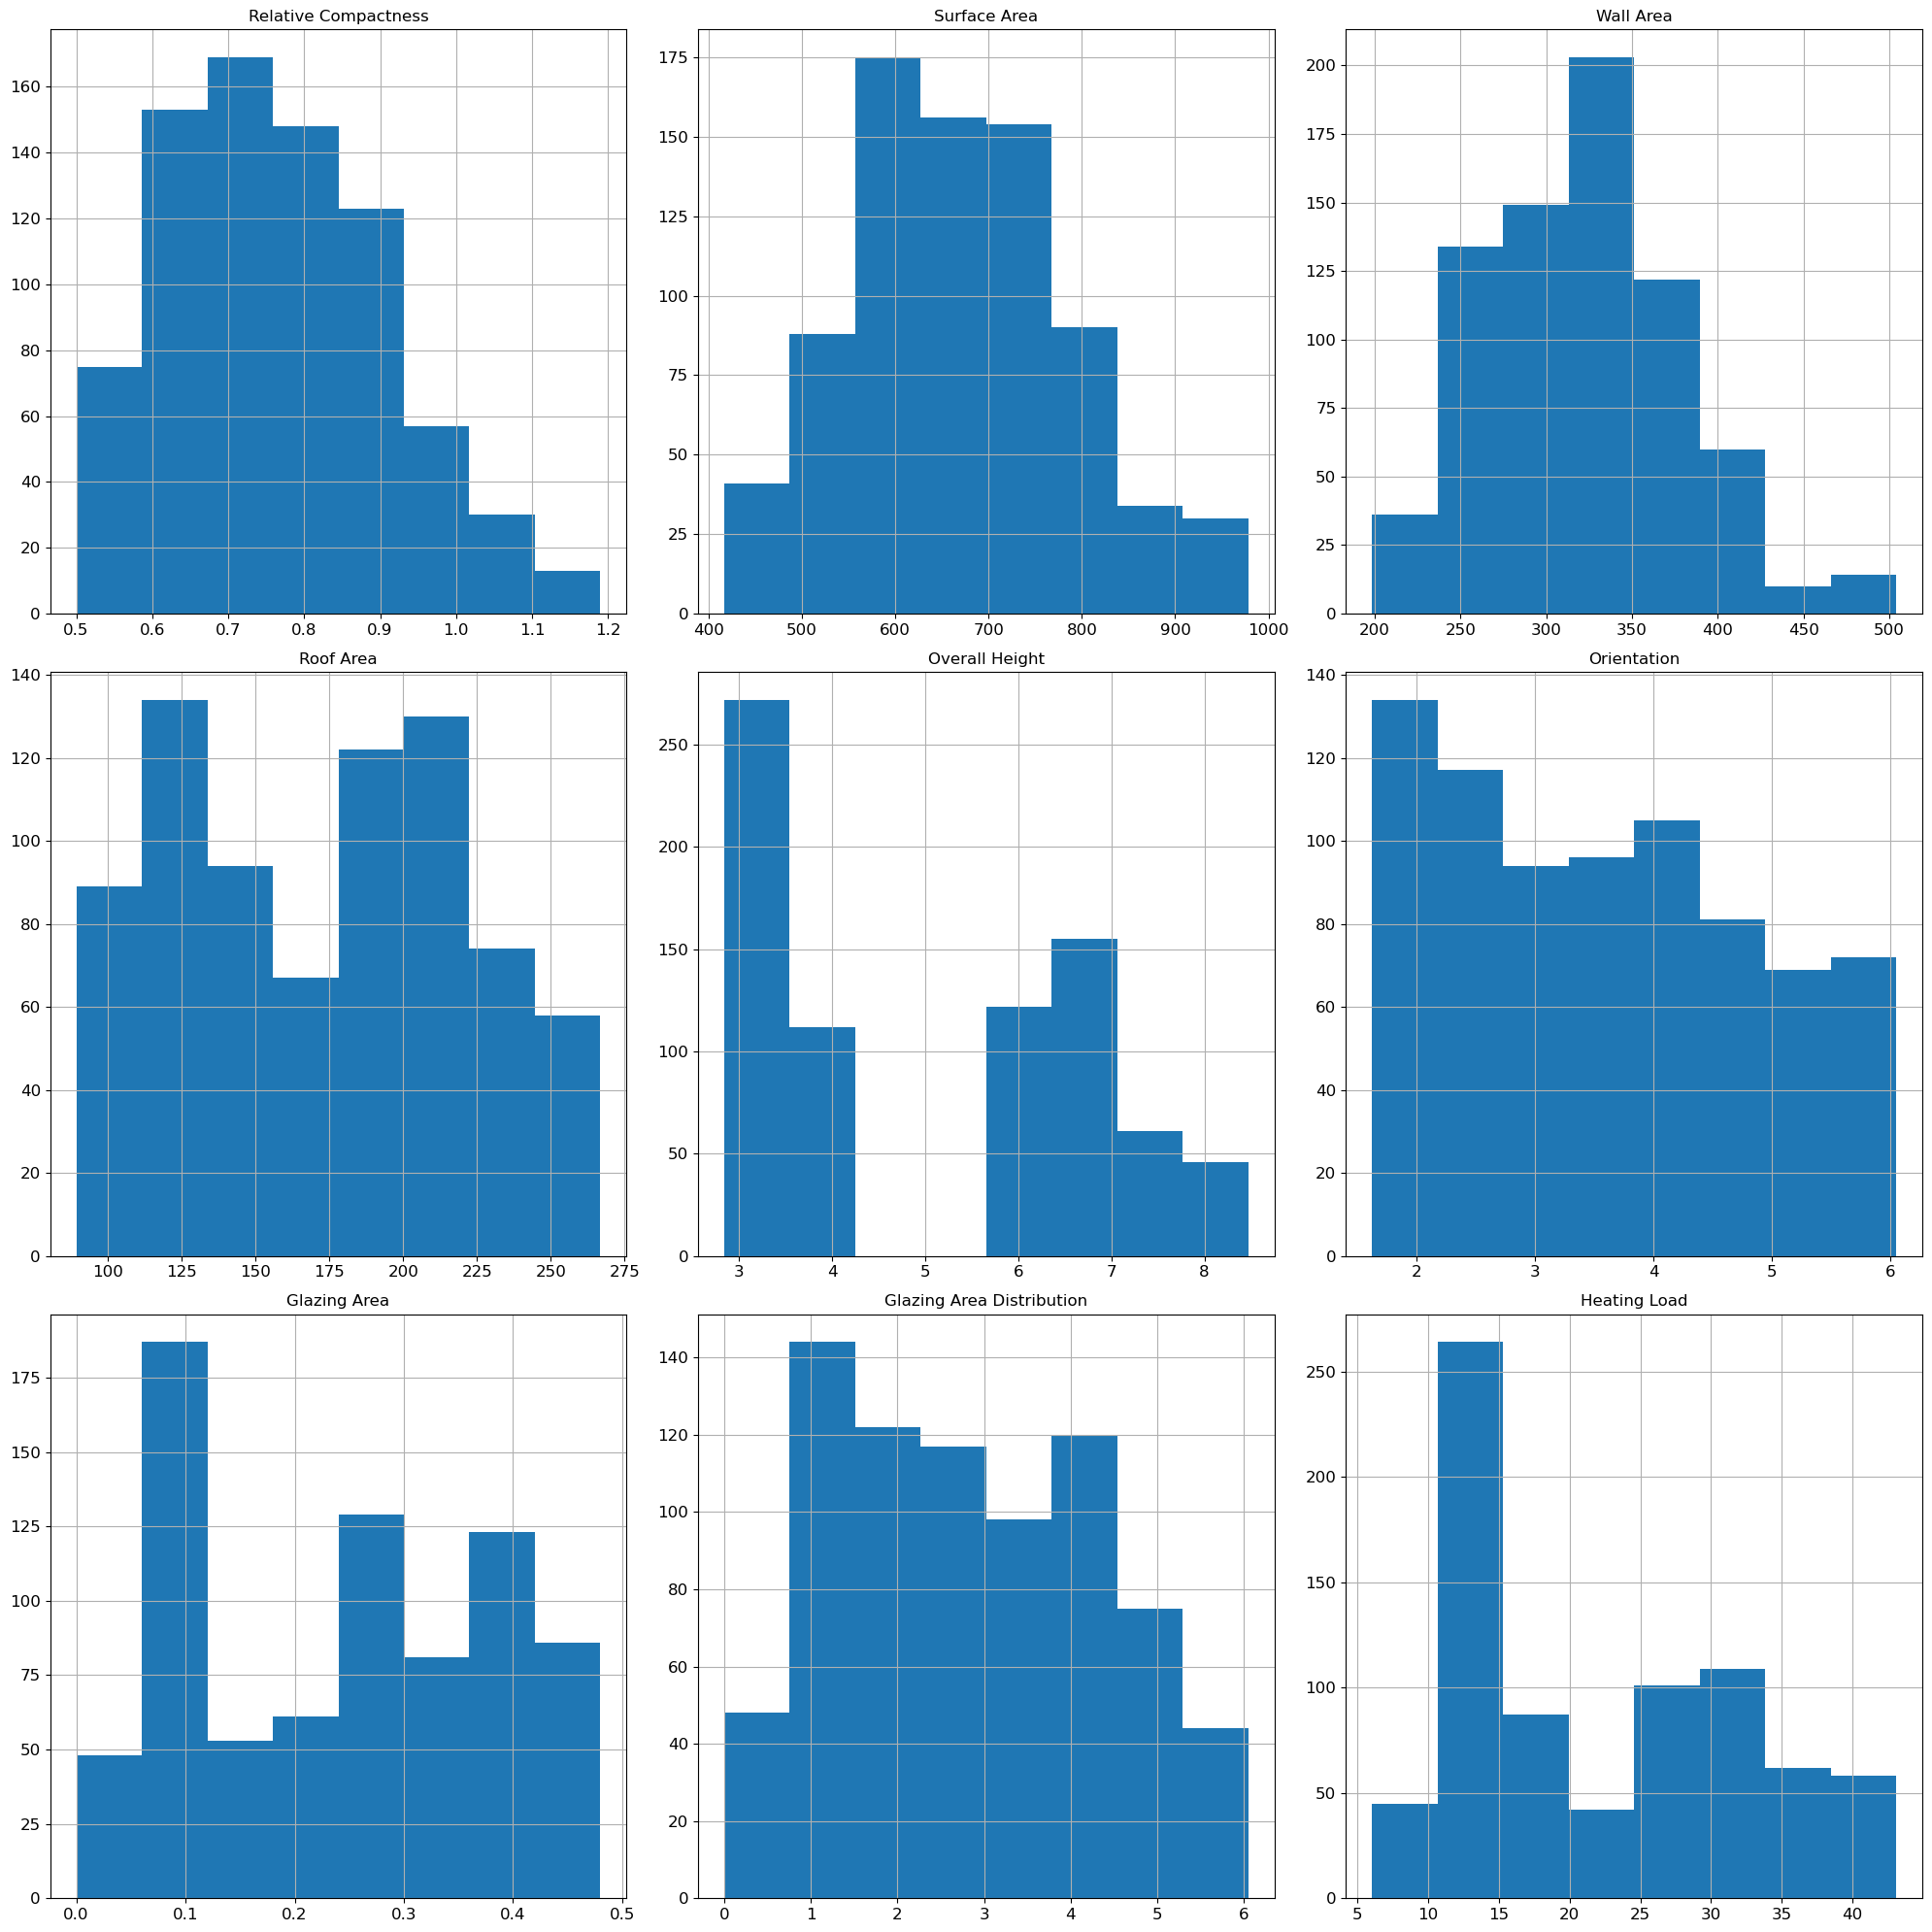

In [8]:

dataset.hist(bins=8, figsize=(20,20))
save_fig("attribute_histogram_plots")
plt.show()

### 3 Create Test Dataset

In [9]:
# Making sure that this notebook's output identical at every run
np.random.seed(42)

### 3.1 Split the data into train and test sets, with 30% test data

In [10]:

train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)

In [11]:
# Testing the test set, whether it returns date or not.
test_set.head()

,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
668,C2,0.68,800.42,444.68,242.55,3.47,1.98,0.32,3.63,16.47
324,C2,0.59,683.55,350.35,242.55,3.47,2.42,0.25,0.90,13.17
624,C2,0.97,509.36,291.06,121.28,5.67,1.62,0.32,2.70,32.82
690,C2,0.64,700.70,339.57,161.70,6.93,3.96,0.40,3.60,41.32
473,C1,0.77,776.16,NaN,266.80,3.47,2.97,0.25,4.40,16.69


<AxesSubplot: >

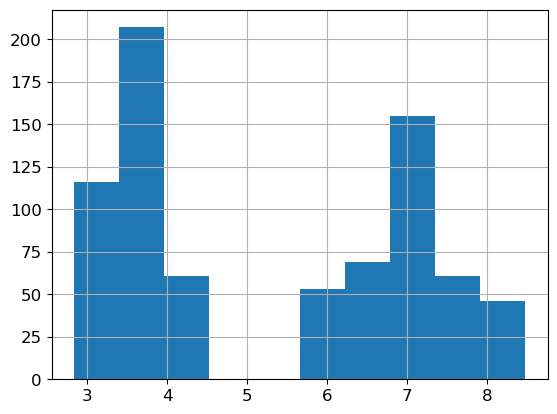

In [12]:
dataset["Overall Height"].hist()

In [13]:


dataset["overall_height_cat"] = pd.cut(dataset["Overall Height"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


In [14]:
dataset["overall_height_cat"].value_counts()

3    332
5    331
4     53
2     52
1      0
Name: overall_height_cat, dtype: int64

<AxesSubplot: >

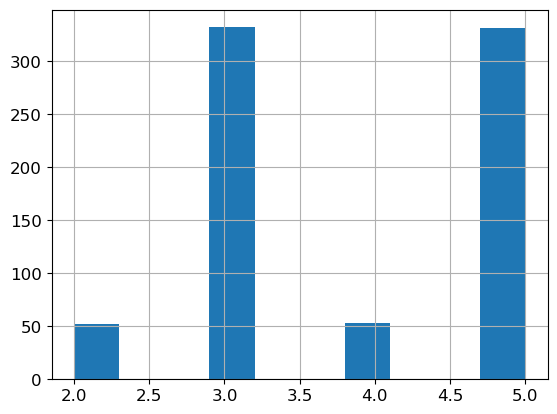

In [15]:
dataset["overall_height_cat"].hist()

In [16]:
# now we do stratified sampling on "overall_height_cat

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["overall_height_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [17]:
strat_test_set["overall_height_cat"].value_counts() / len(strat_test_set)


3    0.435065
5    0.428571
4    0.071429
2    0.064935
1    0.000000
Name: overall_height_cat, dtype: float64

In [18]:
dataset["overall_height_cat"].value_counts() / len(dataset)

3    0.432292
5    0.430990
4    0.069010
2    0.067708
1    0.000000
Name: overall_height_cat, dtype: float64

In [19]:
def overall_height_cat_proportions(data):
    return data["overall_height_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": overall_height_cat_proportions(dataset),
    "Stratified": overall_height_cat_proportions(strat_test_set),
    "Random": overall_height_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
# now we compare proportions of income_cat in the total dataset, and train and test sets obtained with stratified and random sampling
# observe that the stratified sampling leads to proportions similar to the total/overall dataset

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.000000,0.000000,0.000000,NaN,NaN
2,0.067708,0.064935,0.058442,-13.686314,-4.095904
3,0.432292,0.435065,0.409091,-5.366922,0.641527
4,0.069010,0.071429,0.064935,-5.905415,3.504043
5,0.430990,0.428571,0.467532,8.478832,-0.561070


In [21]:
# after stratified sampling using incame_cat we drop this variable from the train and test datasets

for set_ in (strat_train_set, strat_test_set):
    set_.drop("overall_height_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [22]:
# make a copy of the training dataset
dataset = strat_train_set.copy()

### 3.6 Correlations QUESTION: why is the corraleted value is chosen before  the corralation? i.e  in dataset values

In [23]:
corr_matrix = dataset.corr()
print(corr_matrix)

                           Relative Compactness  Surface Area  Wall Area  \
Relative Compactness                   1.000000     -0.529892  -0.107288   
Surface Area                          -0.529892      1.000000   0.134305   
Wall Area                             -0.107288      0.134305   1.000000   
Roof Area                             -0.563310      0.554705  -0.227430   
Overall Height                         0.565366     -0.581858   0.192159   
Orientation                            0.023863      0.022054   0.054170   
Glazing Area                           0.046927      0.017545   0.012325   
Glazing Area Distribution              0.025962     -0.029334  -0.048594   
Heating Load                           0.442177     -0.476845   0.335586   

                           Roof Area  Overall Height  Orientation  \
Relative Compactness       -0.563310        0.565366     0.023863   
Surface Area                0.554705       -0.581858     0.022054   
Wall Area                  -0.22

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_2337/3654063296.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


### Looking for Correlations

In [24]:
corr_matrix = dataset.corr()

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_2337/2046965900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [25]:
corr_matrix["Heating Load"].sort_values(ascending=False)
# Roof Area, (abs value based on the strenght of the correlation)

Heating Load                 1.000000
Overall Height               0.821428
Relative Compactness         0.442177
Wall Area                    0.335586
Glazing Area                 0.263922
Glazing Area Distribution    0.113347
Orientation                  0.008980
Surface Area                -0.476845
Roof Area                   -0.768912
Name: Heating Load, dtype: float64

#### 3.1 Finding Missing Values

In [26]:
# Checking the data with missing values.
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
sample_incomplete_rows


,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
121,C3,0.73,617.40,NaN,218.30,3.47,2.43,0.09,2.00,10.46
473,C1,0.77,776.16,NaN,266.80,3.47,2.97,0.25,4.40,16.69
395,C1,0.69,476.28,NaN,145.53,6.93,4.50,0.22,2.70,29.07
694,C3,0.68,654.88,NaN,134.75,6.93,4.40,0.32,4.40,40.60
563,C2,0.56,889.35,NaN,218.30,3.47,4.95,0.32,0.99,14.42


In [32]:
dataset_cat = dataset[["Category of the building"]]
dataset_cat.head(10)

,Category of the building
21,C2
738,C3
370,C3
32,C3
573,C2
243,C1
428,C2
521,C1
195,C3
602,C1


In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
dataset_cat_encoded = ordinal_encoder.fit_transform(dataset_cat)
dataset_cat_encoded[:10]

array([[1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['C1', 'C2', 'C3'], dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
dataset_cat1_1hot = cat_encoder.fit_transform(dataset_cat)
dataset_cat1_1hot

<614x3 sparse matrix of type '<class 'numpy.float64'>'
	with 614 stored elements in Compressed Sparse Row format>

In [37]:
dataset_cat1_1hot.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

#### 3.2 Computing Empty Values


add summary, textual context

In [27]:
missing_values= dataset.isnull().sum()
print(missing_values)

Category of the building      0
Relative Compactness          0
Surface Area                  0
Wall Area                    35
Roof Area                     0
Overall Height                0
Orientation                   0
Glazing Area                  0
Glazing Area Distribution     0
Heating Load                  0
dtype: int64


#### 3.3 Computing Median Values, and replace empty values with Median values

explain how the decision was made on the missing vals

In [28]:
median = dataset["Wall Area"].median()
dataset["Wall Area"].fillna(median, inplace=True)


In [29]:
sample_incomplete_rows

,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
121,C3,0.73,617.40,NaN,218.30,3.47,2.43,0.09,2.00,10.46
473,C1,0.77,776.16,NaN,266.80,3.47,2.97,0.25,4.40,16.69
395,C1,0.69,476.28,NaN,145.53,6.93,4.50,0.22,2.70,29.07
694,C3,0.68,654.88,NaN,134.75,6.93,4.40,0.32,4.40,40.60
563,C2,0.56,889.35,NaN,218.30,3.47,4.95,0.32,0.99,14.42


TODO add markdown and explanation of the data visualised

Saving figure scatter_matrix_plot


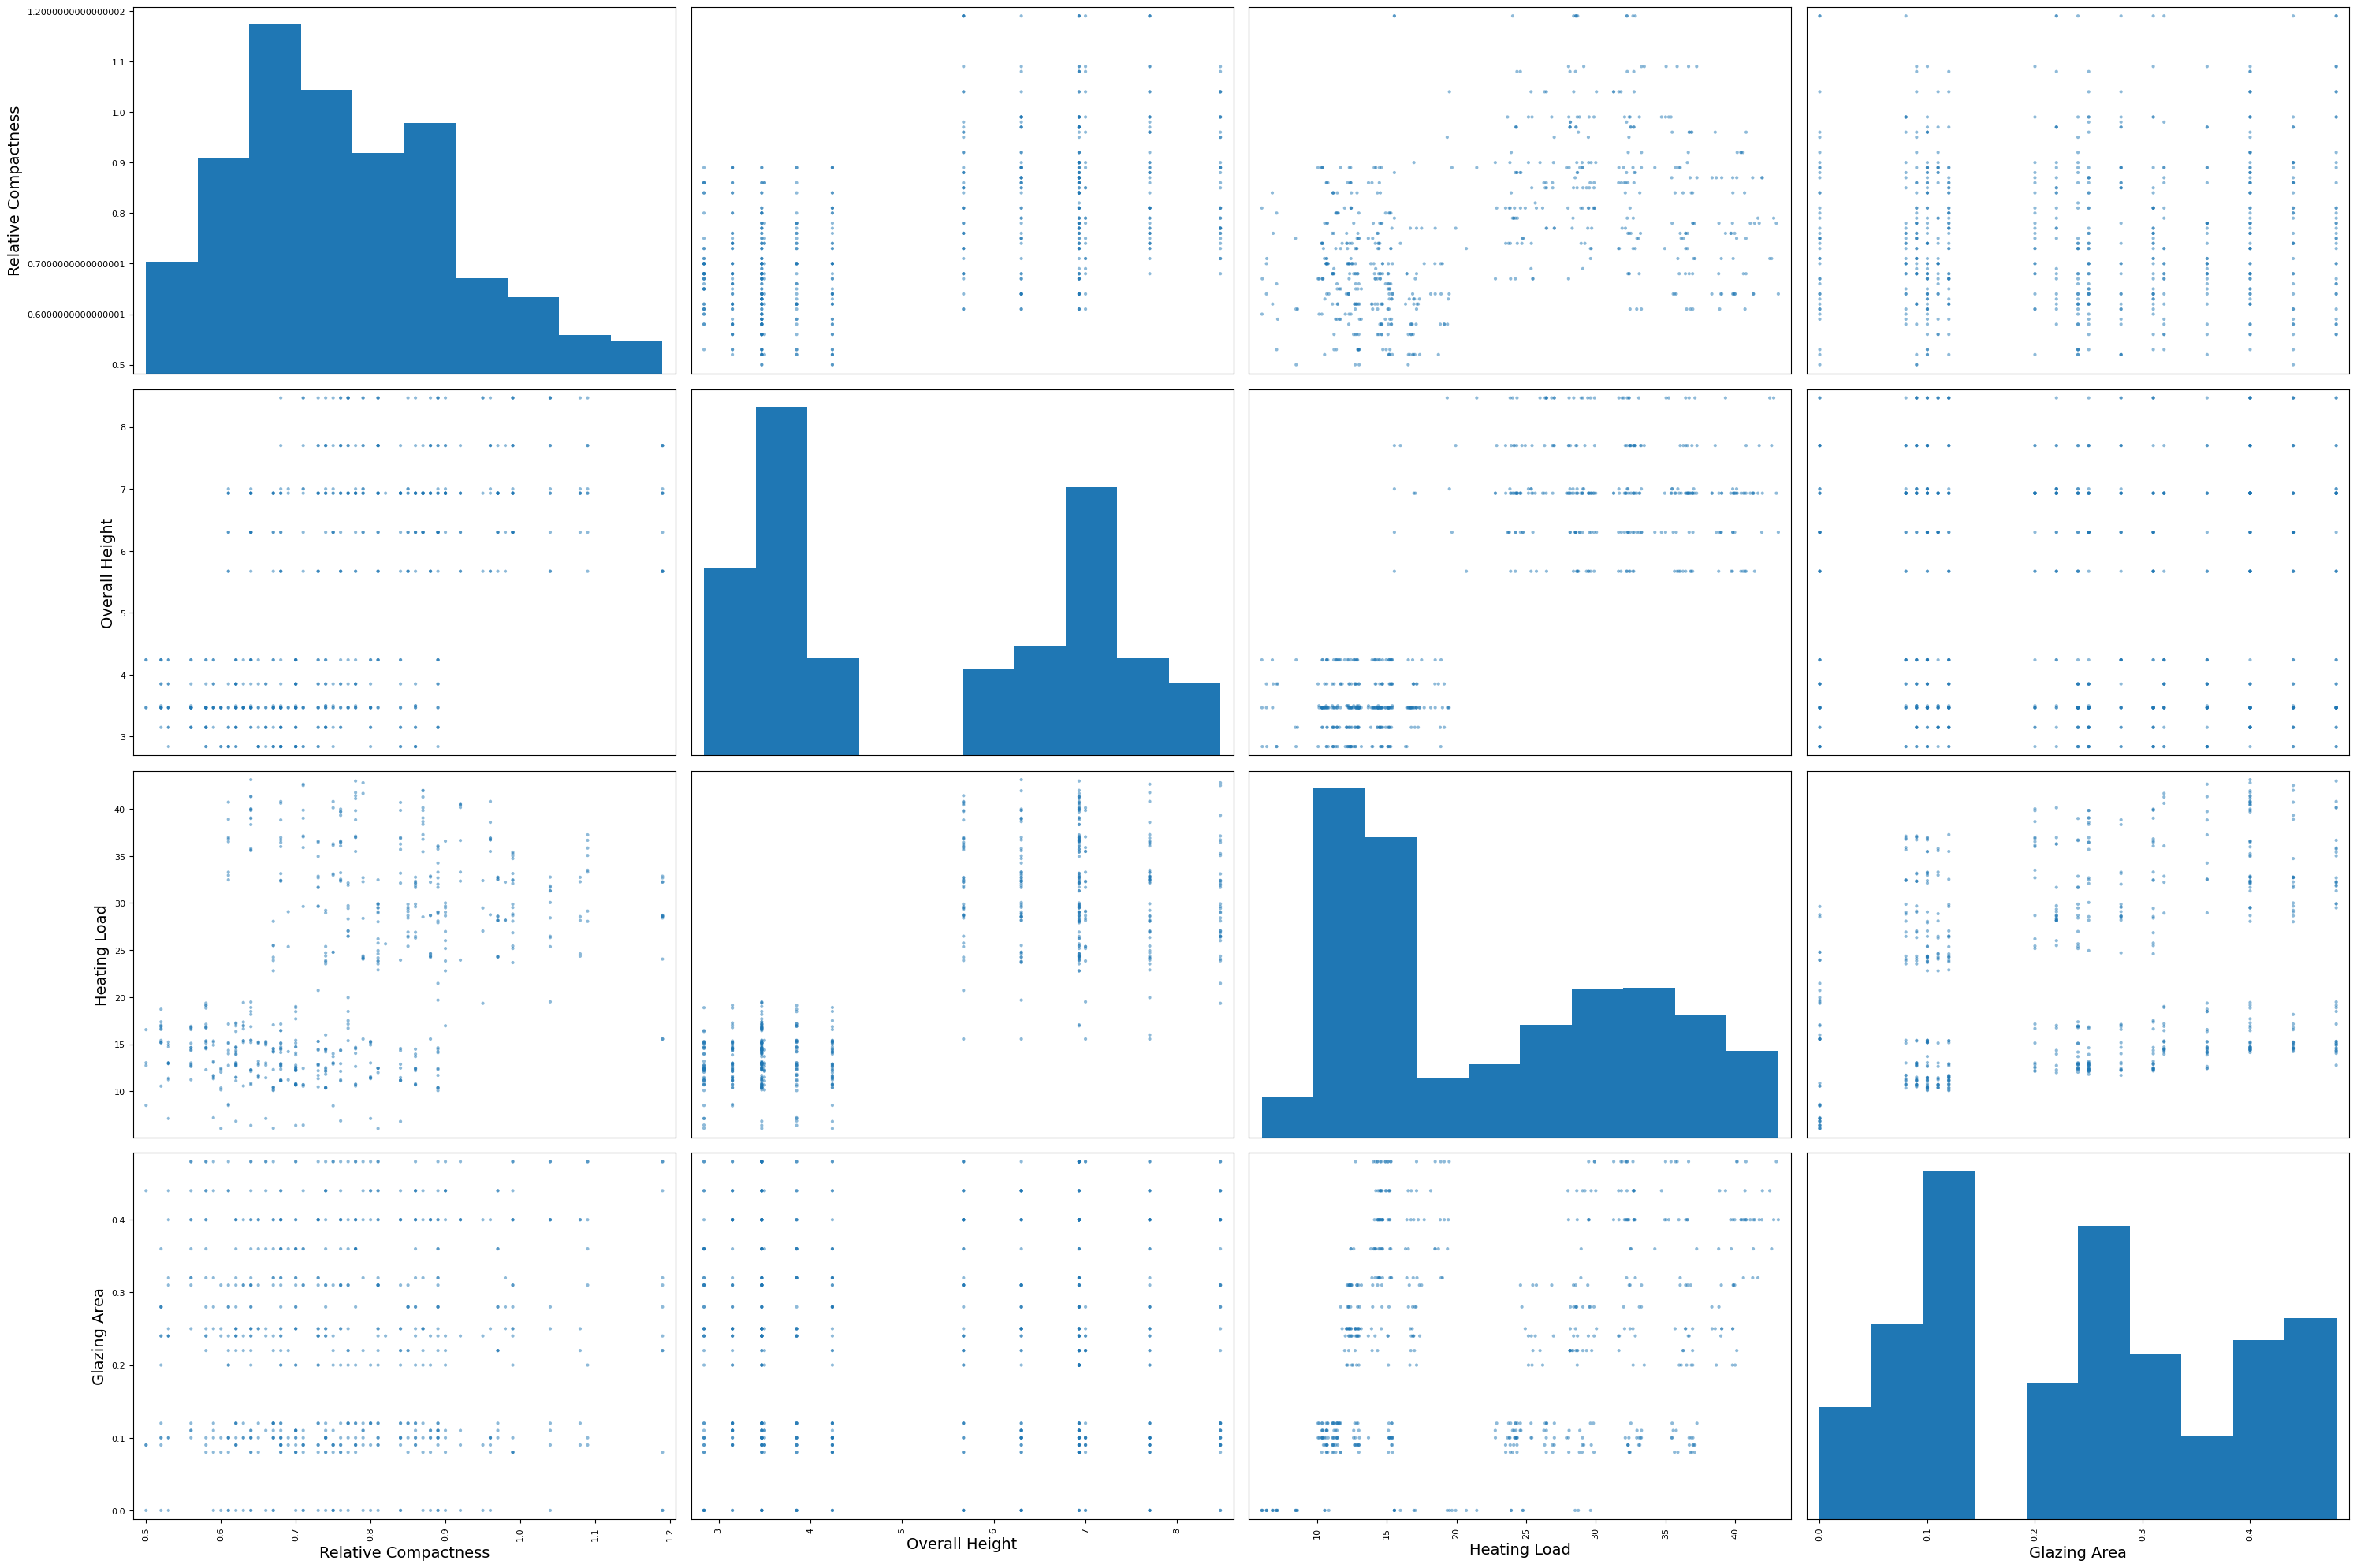

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["Relative Compactness", "Overall Height", "Heating Load", "Glazing Area"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

### 3.7 Drop labels for training set


In [ ]:
dataset = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
dataset_labels = strat_train_set["median_house_value"].copy()

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(dataset_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

dataset_prepared = full_pipeline.fit_transform(dataset)

## Build the model

### a) Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(dataset_prepared, dataset_labels)

NameError: name 'dataset_prepared' is not defined

### 3.7 Data Transformations


**Scale of the data**: If the data is on different scales, some machine learning algorithms may not perform well. In this case, you may want to consider data normalization or standardization to scale the data to a common range.

**!Distribution of the data**: If the data is not normally distributed, data transformation methods such as log transformation, box-cox transformation, or Yeo-Johnson transformation may be helpful to normalize the data and improve the performance of the model.

**Feature engineering**: If the dataset contains a large number of features, feature selection or feature extraction methods may be helpful to reduce the dimensionality of the dataset and improve the performance of the model. (check course example i.e dataset)

**Handling categorical data**: If the dataset contains categorical data, data transformation methods such as one-hot encoding or label encoding may be helpful to convert the categorical data into numerical data that can be used in the model.

**Outlier detection**: Outliers in the data can have a significant impact on the performance of the model. Data transformation methods such as winsorization or trimming may be helpful to handle outliers in the data.

### 3.8 Feature Selection

### 4. Linear Regression